In [16]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [17]:
#Import any library here only.
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np

## <font color='orange'>Task #1</font>

Data loading and understanding data

In [18]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/OpenCode/OpenCodeData.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/OpenCode/OpenCodeData.zip
replace OpenCodeData/OpenCodeData/INFECTED/person1_virus_11.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_11.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_12.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_13.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_6.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_7.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_8.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_9.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person10_virus_35.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_475.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1

In [ ]:
#Setup and check a gpu connection.


In [19]:
''' Do not change this cell '''
check_gpu()

GPU sucessfully connected


In [20]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.

def resize_list_images(image_folder):

    image_files = []
    for f in os.listdir(image_folder):
        path = os.path.join(image_folder, f)
        image = cv2.imread(path)
        resized_image = cv2.resize(image, (1000, 1000))# (w, h)
        cv2.imwrite(path, resized_image)
        image_files.append(path)
    return image_files

def get_label(image_path):

    base_name = os.path.basename(image_path)
    folder_name = os.path.dirname(image_path)

    if folder_name.endswith("NORMAL"):
        return "Normal"
    elif folder_name.endswith("INFECTED"):
        # Determines the label based on what text is present after first occurence of '_' in filename
        parts = base_name.split('_')
        if len(parts) > 1:
            if "virus" in parts[1].lower():
                return "Virus Infected"
            elif "bacteria" in parts[1].lower():
                return "Bacteria Infected"

    return "Unknown"


# Relative folder paths

normal_folder = r"/content/OpenCodeData/OpenCodeData/NORMAL"
infected_folder = r"/content/OpenCodeData/OpenCodeData/INFECTED"

normal_images = resize_list_images(normal_folder)
infected_images = resize_list_images(infected_folder)
Images = normal_images + infected_images

Labels = []
bacterial = 0
viral = 0
normal = len(os.listdir(normal_folder))
for img in Images:
    label = get_label(img)
    if label == "Bacteria Infected":
        bacterial+=1
    elif label == "Virus Infected":
        viral+=1
    Labels.append(label)

# print("\nLabels for the images:")
# for image, label in zip(Images, Labels):
#     print(f"{image}: {label}")
print("Number of normal images: ", normal)
print("Number of bacteria affected images: ", bacterial)
print("Number of virus affected images: ", viral)


Number of normal images:  234
Number of bacteria affected images:  242
Number of virus affected images:  148


In [ ]:
''' Do not change this cell '''
check_data()

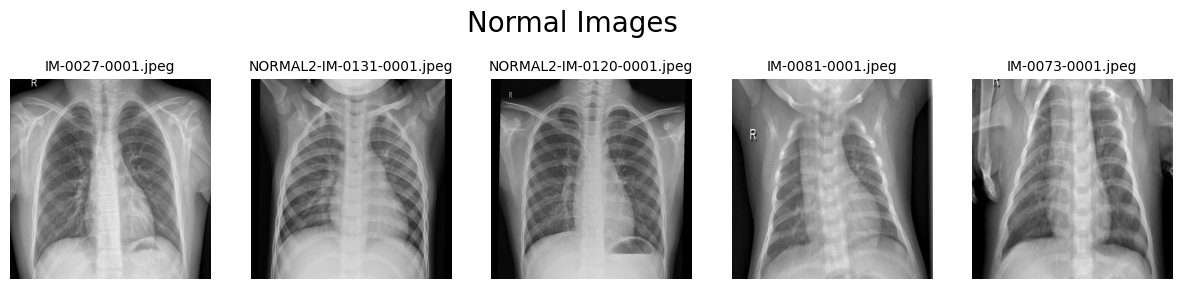

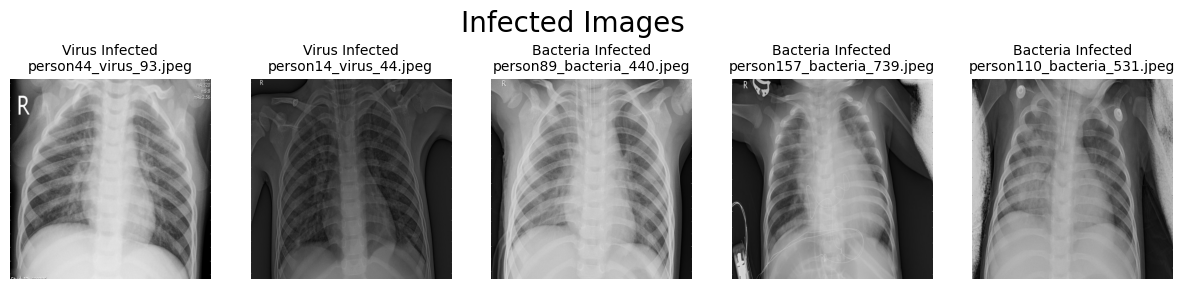

In [21]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.

def plot_images(labels, images, title, ):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))
    fig.suptitle(title, fontsize=20)

    offset = len(os.listdir(normal_folder))
    for i in range(5):
        ax = axes[i]
        random_file = random.choice(images)
        image = cv2.imread(random_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        label = ""
        if title == "Infected Images":
            label = labels[infected_images.index(random_file) + offset]+"\n"
        label = label+os.path.basename(random_file)
        ax.set_title(label, fontsize=10)
        ax.axis('off')
    plt.show()

plot_images(Labels, normal_images, "Normal Images")
plot_images(Labels, infected_images, "Infected Images")